In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
import nltk
from nltk.corpus import stopwords
import string

In [20]:
#nltk.download('stopwords')

In [21]:
def clean_text(text):
    text = text.lower()
    text = ''.join([c for c in text if c not in string.punctuation])
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)


In [22]:
import pandas as pd

column_names = ['sentiment', 'user_id', 'timestamp', 'query', 'username', 'text']

df = pd.read_csv('twitter_dataset.csv',names= column_names, quotechar='"', on_bad_lines='skip', encoding='utf-8')

In [23]:
print(df.columns)


Index(['sentiment', 'user_id', 'timestamp', 'query', 'username', 'text'], dtype='object')


In [24]:
stop_words = set(stopwords.words('english'))
df['clean_text'] = df['text'].apply(clean_text)
print(df[['text', 'clean_text']].head(10))

                                                text  \
0  @switchfoot http://twitpic.com/2y1zl - Awww, t...   
1  is upset that he can't update his Facebook by ...   
2  @Kenichan I dived many times for the ball. Man...   
3    my whole body feels itchy and like its on fire    
4  @nationwideclass no, it's not behaving at all....   
5                      @Kwesidei not the whole crew    
6                                        Need a hug    
7  @LOLTrish hey  long time no see! Yes.. Rains a...   
8               @Tatiana_K nope they didn't have it    
9                          @twittera que me muera ?    

                                          clean_text  
0  switchfoot httptwitpiccom2y1zl awww thats bumm...  
1  upset cant update facebook texting might cry r...  
2  kenichan dived many times ball managed save 50...  
3                   whole body feels itchy like fire  
4           nationwideclass behaving im mad cant see  
5                                kwesidei whole crew 

In [26]:


# Split data
X = df['clean_text']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorization
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Model training
model = MultinomialNB()
model.fit(X_train_vec, y_train)

# Prediction
y_pred = model.predict(X_test_vec)

# Results
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7743

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.81      0.78    159494
           4       0.80      0.74      0.77    160506

    accuracy                           0.77    320000
   macro avg       0.78      0.77      0.77    320000
weighted avg       0.78      0.77      0.77    320000



In [27]:
df['sentiment'] = df['sentiment'].map({0: 'negative', 2: 'neutral', 4: 'positive'})


In [28]:
sentiment_counts = df['sentiment'].value_counts()
print(sentiment_counts)

sentiment
negative    800000
positive    800000
Name: count, dtype: int64


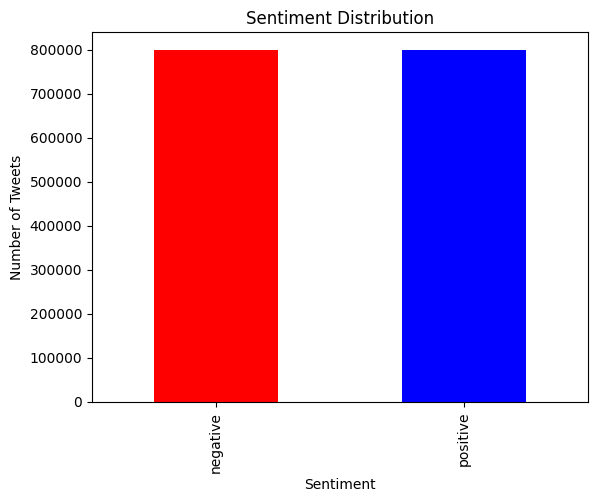

In [29]:
import matplotlib.pyplot as plt

sentiment_counts.plot(kind='bar', color=['red', 'blue', 'green'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()
